In [1]:
library(conos)


Loading required package: Matrix

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
con <- readRDS(file='/home/jmitchel/data/lupus_data/lupus_conos2.rds')


In [4]:
str(con)

Classes 'Conos', 'R6' <Conos>
  Public:
    addSamples: function (x, replace = FALSE, verbose = FALSE) 
    buildGraph: function (k = 15, k.self = 10, k.self.weight = 0.1, alignment.strength = NULL, 
    clone: function (deep = FALSE) 
    clusters: list
    correctGenes: function (genes = NULL, n.od.genes = 500, fading = 10, fading.const = 0.5, 
    embedding: 4.13515996949932 -0.463756561109812 0.342748880555837 1. ...
    embeddings: list
    embedGraph: function (method = "largeVis", embedding.name = method, M = 1, 
    expression.adj: list
    findCommunities: function (method = leiden.community, min.group.size = 0, name = NULL, 
    getClusterCountMatrices: function (clustering = NULL, groups = NULL, common.genes = TRUE, 
    getDatasetPerCell: function () 
    getDifferentialGenes: function (clustering = NULL, groups = NULL, z.threshold = 3, 
    getJointCountMatrix: function (raw = FALSE) 
    graph: igraph
    initialize: function (x, ..., n.cores = parallel::detectCores(logic

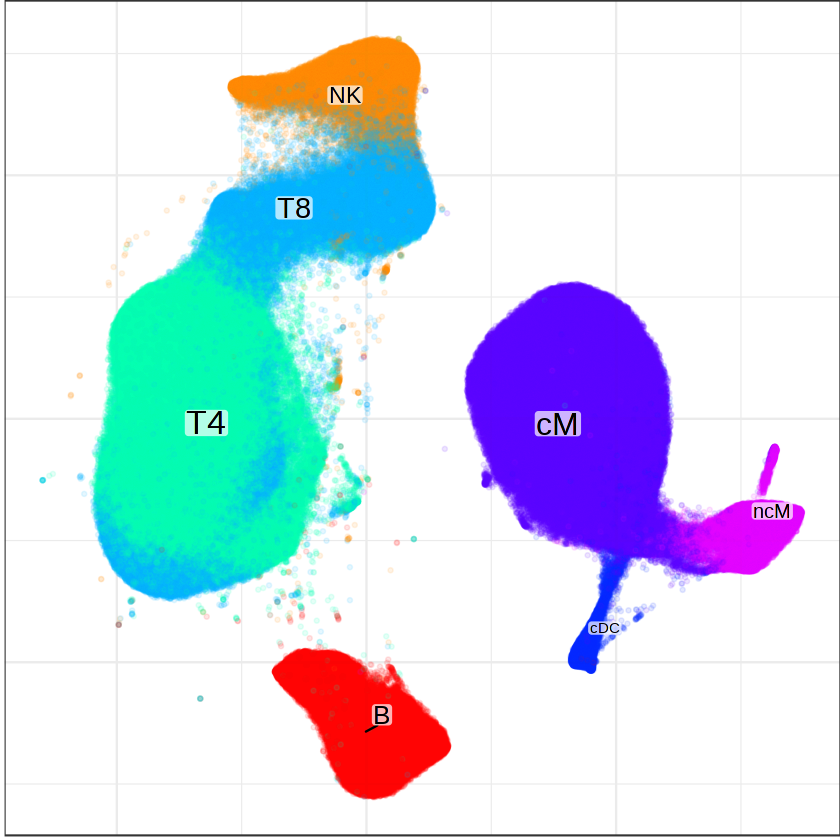

In [5]:
con$plotGraph(alpha=0.1)

In [6]:
dim(con$embedding)

[1] 704673      2

In [24]:
pbmc <- readRDS('/home/jmitchel/data/lupus_data/lupus_subsetted_seurat_v3.rds')


In [8]:
new_grp_nms <- pbmc@meta.data[rownames(con$embedding),'ct_cov']

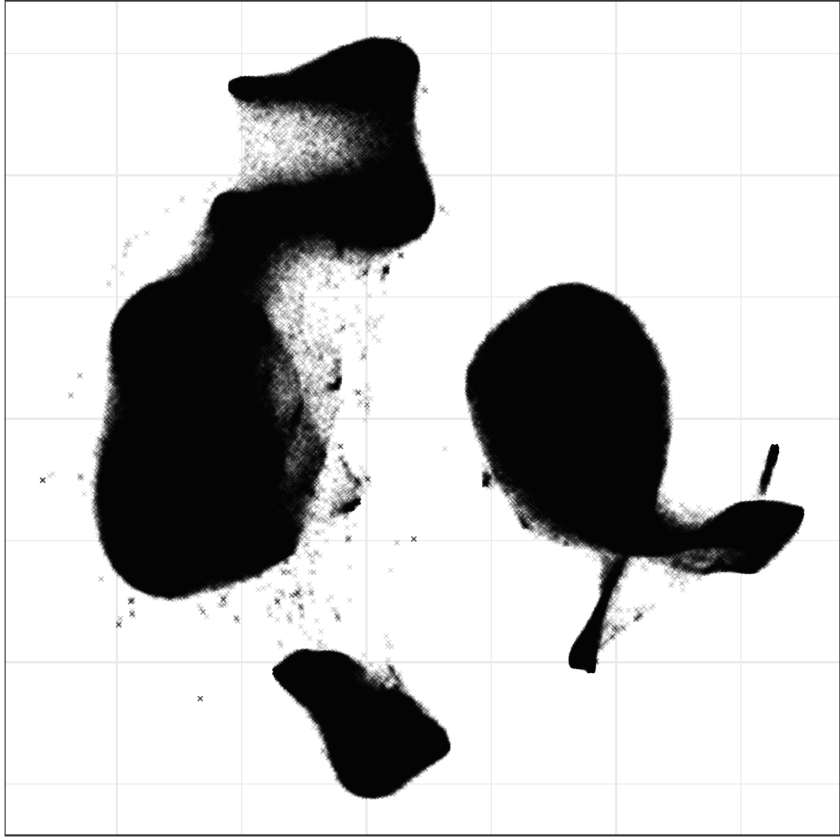

In [10]:
con$plotGraph(alpha=0.1)

In [19]:
con$clusters$leiden$groups <- as.factor(new_grp_nms)
names(con$clusters$leiden$groups) <- rownames(con$embedding)

In [22]:
jpeg(file='/home/jmitchel/figures/test.jpg')
con$plotGraph(alpha=.1)
dev.off()

png 
  2

In [18]:
levels(con$clusters$leiden$groups)

[1] "Bmem"     "Bnaive"   "NKbright" "NKdim"    "PB"       "Progen"  
 [7] "Prolif"   "T4em"     "T4naive"  "T4reg"    "T8cyto"   "T8em"    
[13] "T8naive"  "cDC"      "cM"       "ncM"      "pDC"

In [25]:
# checking if my pbmc object has the smaller cell types or I already removed those
unique(pbmc@meta.data$ct_cov)

[1] cM       Bmem     T4reg    T4naive  T4em     NKdim    T8naive  T8em    
 [9] T8cyto   Bnaive   ncM      cDC      NKbright Prolif   pDC      PB      
[17] Progen  
17 Levels: Bmem Bnaive NKbright NKdim PB Progen Prolif T4em T4naive ... pDC